# COVID 19 Data Analysis (Nafeeur R.)

This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [ ]:
df.head(10) # Print the first 5

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
5,2020-01-25,California,6,1,0
6,2020-01-25,Illinois,17,1,0
7,2020-01-25,Washington,53,1,0
8,2020-01-26,Arizona,4,1,0
9,2020-01-26,California,6,2,0


In [ ]:
df.shape # Gives the number of row and collumn of the data set

(28724, 5)

In [ ]:
df.columns # Prints the collumn names 

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [ ]:
nydf = df[df['state']=='New York']

In [ ]:
nydf.head(10)

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0
338,2020-03-06,New York,36,44,0
369,2020-03-07,New York,36,89,0
404,2020-03-08,New York,36,106,0
440,2020-03-09,New York,36,142,0
478,2020-03-10,New York,36,173,0


In [ ]:
nydf.shape

(524, 5)

In [ ]:
nydf.tail(10)

,date,state,fips,cases,deaths
28207,2021-07-28,New York,36,2140050,53248
28262,2021-07-29,New York,36,2142694,53250
28317,2021-07-30,New York,36,2145309,53257
28372,2021-07-31,New York,36,2148445,53266
28427,2021-08-01,New York,36,2151035,53274
28482,2021-08-02,New York,36,2153243,53281
28537,2021-08-03,New York,36,2156305,53294
28592,2021-08-04,New York,36,2159139,53301
28647,2021-08-05,New York,36,2162581,53315
28702,2021-08-06,New York,36,2166341,53318


In [ ]:
#first death in NY
nydf_death = nydf[nydf['deaths'] >= 1]
nydf_death.head(6)

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32
936,2020-03-19,New York,36,4161,39


In [ ]:
#total number of cases
nydf['cases'].max()

2166341

In [ ]:
# Not a correct way of calculating total count becasue the data is cumilative
nydf['cases'].sum()

527429255

Finding new covid 19 cases on daily basis (new cases added everyday)

In [ ]:
# New cases for NY

newcase = []
pre_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - pre_case
  pre_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)
  

In [ ]:
nydf['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
nydf['new_cases'].sum()

2166341

In [ ]:
ny_cases = nydf['cases']
ny_deaths = nydf['deaths']
ny_dates = nydf['date']
ny_new_cases = nydf['new_cases']

In [ ]:
type(ny_new_cases)

pandas.core.series.Series

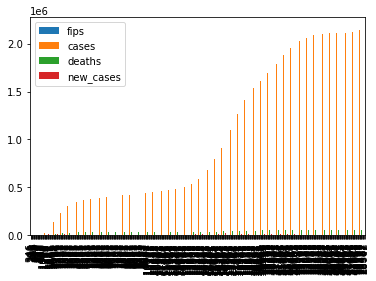

In [ ]:
nydf.plot(kind='bar')

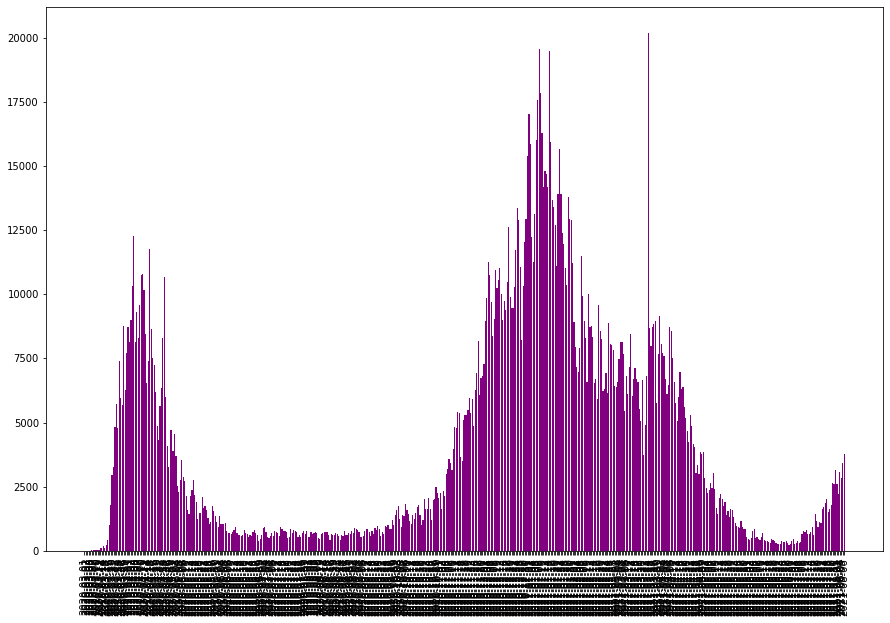

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(x=ny_dates, height=ny_new_cases, color='purple')
plt.xticks(rotation=90)
plt.show()

# NY covid 19 data in last 50 days

In [ ]:
ny_cases_50 = nydf['cases'][-51:-1]
ny_deaths_50 = nydf['deaths'] [-51:-1]
ny_dates_50 = nydf['date'][-51:-1]
ny_new_cases_50 = nydf['new_cases'][-51:-1]

In [ ]:
# ny_dates_50

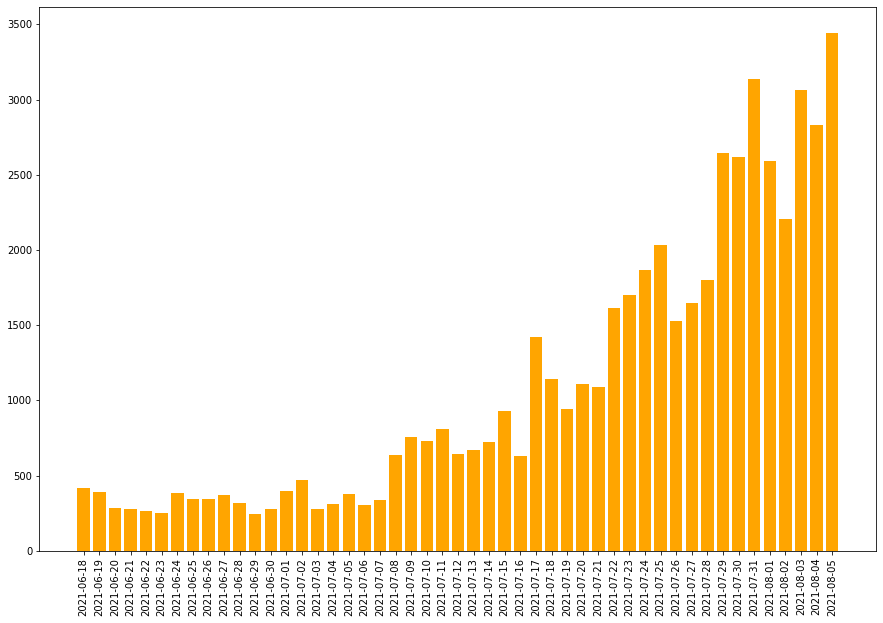

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(x=ny_dates_50, height=ny_new_cases_50, color='orange')
plt.xticks(rotation=90)
plt.show()

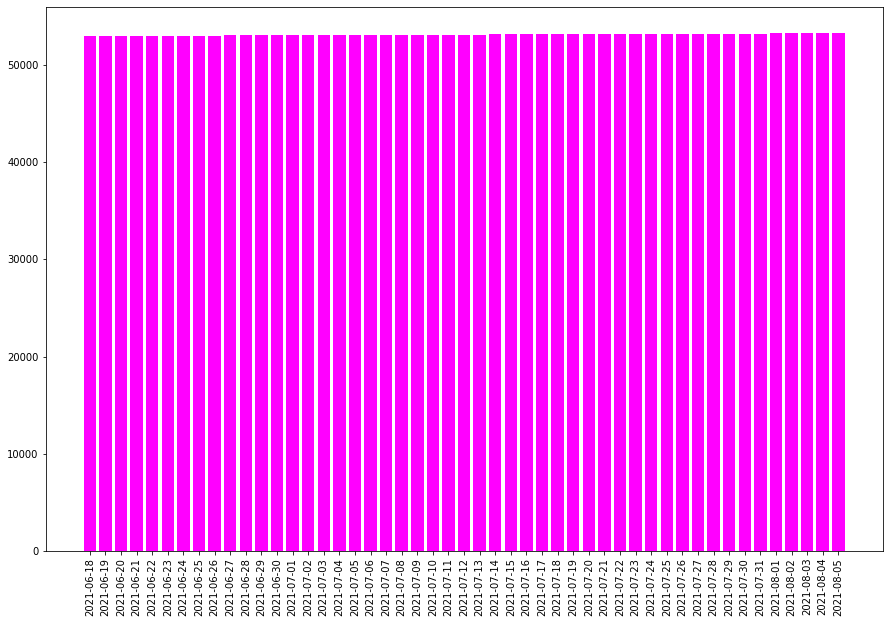

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(x=ny_dates_50, height=ny_deaths_50, color='magenta')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Covid 19 cases after March 2020 for states: New York, California, Michigan, Texas, Arizona, Virginia

In [ ]:
states = ['New York', 'California','Michigan', 'Texas','Arizona', 'Virginia']

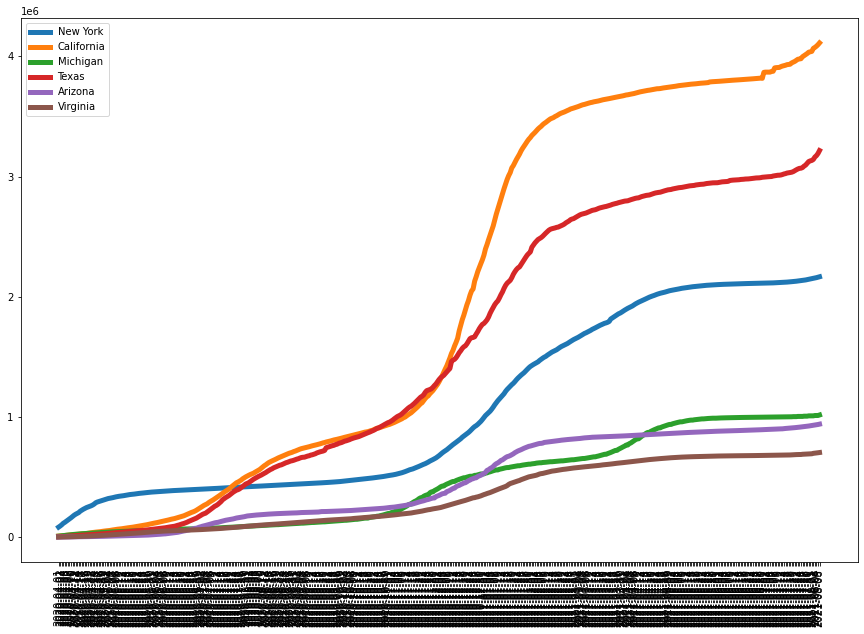

In [ ]:
plt.figure(figsize=(15,10))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-04-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=5
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()
